<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/ZTM_Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, precision_score,recall_score,f1_score,plot_roc_curve

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ZTM/heart-disease.csv')

In [5]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Corr with target')

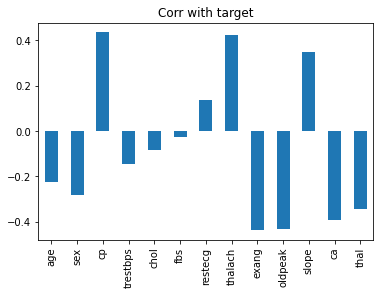

In [7]:
data.corr()['target'][0:-1].plot(kind='bar')
plt.title('Corr with target')

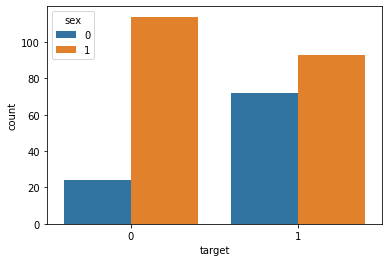

In [8]:
sns.countplot(data=data,x='target',hue='sex')

Text(0, 0.5, 'number')

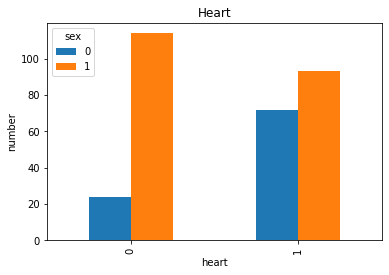

In [9]:
pd.crosstab(data['target'],data['sex']).plot(kind='bar')
plt.title('Heart')
plt.xlabel('heart')
plt.ylabel('number')

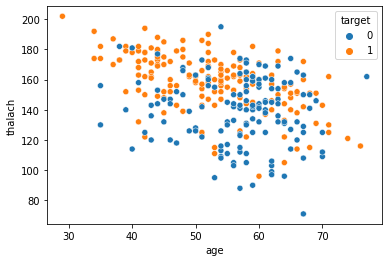

In [10]:
sns.scatterplot(data=data,x='age',y='thalach',hue='target')

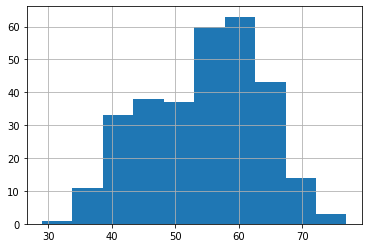

In [11]:
data['age'].hist()

In [12]:
from scipy.stats import skew


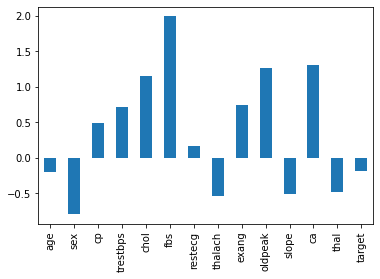

In [13]:
data.skew().plot(kind='bar')

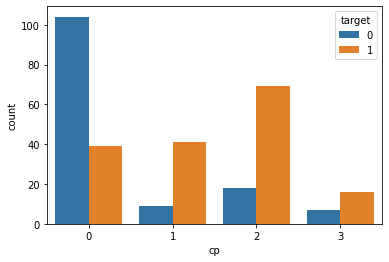

In [14]:
sns.countplot(data=data,x='cp',hue='target')

In [15]:
y = data['target']
X = data.drop('target',axis=1)

In [16]:
models = {'logistics regression':LogisticRegression(max_iter=1000),
          'KNN':KNeighborsClassifier(n_neighbors=10),
          'Random Forest':RandomForestClassifier()}

In [17]:
def fit_and_score(models,X,y):
    model_accs = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_accs[name]= model.score(X_test,y_test)
    model_accs =pd.DataFrame(model_accs, index=['Acc'])
    return model_accs
model_accs =fit_and_score(models,X,y)

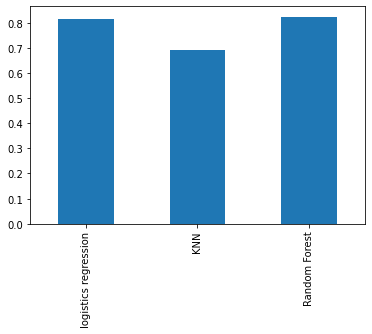

In [19]:
model_accs.iloc[0].plot(kind='bar')

In [47]:
train_score = []
test_score = []
neighbors = range(1,200)
knn=KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score.append(knn.score(X_test,y_test))
    train_score.append(knn.score(X_train,y_train))

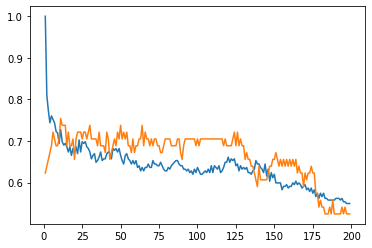

In [48]:
plt.plot(neighbors,train_score)
plt.plot(neighbors,test_score)

In [29]:
lr_grid={'C':np.logspace(-4,4,20),
         'solver':['liblinear']}

rf_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth': [None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

In [35]:
random_cs = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=lr_grid,
                               cv=5,
                               n_iter=100,
                               verbose=True)

In [36]:
random_cs.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
random_cs.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [39]:
random_cs.score(X_test,y_test)

0.8461538461538461

In [40]:
random_forest_cs = RandomizedSearchCV(estimator=RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=100,
                               verbose=True)

In [42]:
random_forest_cs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
random_forest_cs.score(X_test,y_test)

0.8131868131868132

In [44]:
random_forest_cs.best_params_

{'max_depth': 3,
 'min_samples_leaf': 15,
 'min_samples_split': 10,
 'n_estimators': 60}

In [66]:
lr_grid={'C':np.logspace(-5,5,30),
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'max_iter': [10000]}

In [67]:
grid_search_log_reg = GridSearchCV(LogisticRegression(),
                                   param_grid=lr_grid,
                                   cv=5,
                                   verbose=True)

In [68]:
grid_search_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05]),
                         'max_iter': [10000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [76]:
grid_search_log_reg.score(X_test,y_test)

In [79]:
y_pred = grid_search_log_reg.predict(X_test)

In [103]:
grid_search_log_reg.best_params_

{'C': 3.2903445623126713, 'max_iter': 10000, 'solver': 'sag'}

In [96]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report, precision_score,recall_score,f1_score,plot_roc_curve

In [95]:
confusion_matrix(y_test,y_pred)

array([[25,  4],
       [ 3, 29]])

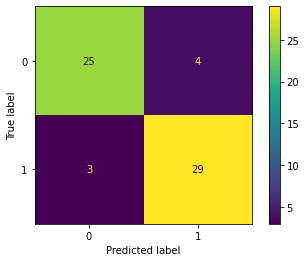

In [100]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


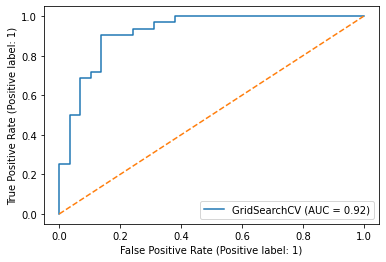

In [93]:
plot_roc_curve(grid_search_log_reg,X_test,y_test)
plt.plot([0,1],'--')

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [104]:
best_parameters = grid_search_log_reg.best_params_

In [136]:
log_reg_best = LogisticRegression(**best_parameters)

In [137]:
log_reg_best.fit(X,y)

LogisticRegression(C=3.2903445623126713, max_iter=10000, solver='sag')

In [116]:
mean_acc = cross_val_score(log_reg_best,X,y,cv=5,scoring='accuracy').mean()
mean_acc

0.8413661202185793

In [117]:
mean_precision = cross_val_score(log_reg_best,X,y,cv=5,scoring='precision').mean()
mean_precision

0.8202572248411559

In [118]:
mean_recall = cross_val_score(log_reg_best,X,y,cv=5,scoring='recall').mean()
mean_recall

0.9151515151515153

In [119]:
mean_f1 = cross_val_score(log_reg_best,X,y,cv=5,scoring='f1').mean()
mean_f1

0.8638349403319877

In [124]:
cv_metrics= pd.DataFrame({'ACC':mean_acc,
                           'precission':mean_precision,
                           'recall':mean_recall,
                           'f1':mean_f1},index=[0])

In [130]:
cv_metrics

,ACC,precission,recall,f1
0,0.841366,0.820257,0.915152,0.863835


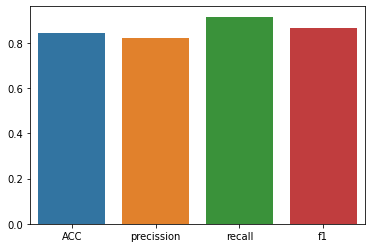

In [133]:
sns.barplot(data=cv_metrics);

In [134]:
#feature importance

In [135]:
cross_val_score.coef_

AttributeError: ignored

In [141]:
list(log_reg_best.coef_[0])

[0.0077370139416177855,
 -0.6174648127478559,
 0.7304809221487287,
 -0.015169759805048477,
 -0.0023157768848658168,
 -0.013451002148165359,
 0.213486345332695,
 0.02728611072486555,
 -0.43433206481622616,
 -0.570555913938002,
 0.28157508953263294,
 -0.6531569537858422,
 -0.6118133424225197]

In [139]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [144]:
features = dict(zip(data.columns,list(log_reg_best.coef_[0])))

In [148]:
features

{'age': 0.0077370139416177855,
 'ca': -0.6531569537858422,
 'chol': -0.0023157768848658168,
 'cp': 0.7304809221487287,
 'exang': -0.43433206481622616,
 'fbs': -0.013451002148165359,
 'oldpeak': -0.570555913938002,
 'restecg': 0.213486345332695,
 'sex': -0.6174648127478559,
 'slope': 0.28157508953263294,
 'thal': -0.6118133424225197,
 'thalach': 0.02728611072486555,
 'trestbps': -0.015169759805048477}

In [156]:
features = pd.DataFrame(features,index=[0])

In [157]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.007737,-0.617465,0.730481,-0.01517,-0.002316,-0.013451,0.213486,0.027286,-0.434332,-0.570556,0.281575,-0.653157,-0.611813


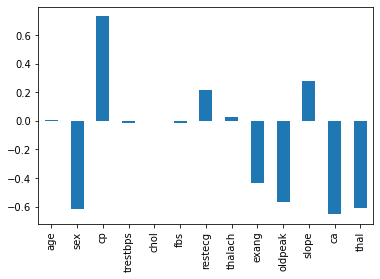

In [161]:
features.iloc[0].plot(kind='bar')

Text(0.5, 1.0, 'Corr with target')

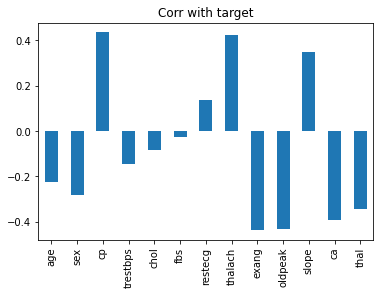

In [162]:
data.corr()['target'][0:-1].plot(kind='bar')
plt.title('Corr with target')